## Instalacja

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!pip install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 5.1 MB/s 
     |████████████████████████████████| 190 kB 51.9 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.6.1-cp37-cp37m-linux_x86_64.whl size=20948700 sha256=0d77d2708bc910977101a4a6d7ad14f37200b240a24b1ecb962c363209b4f94e
  Stored in directory: /root/.cache/pip/wheels/a6/f3/f8/bc5b70943e7de08aabc5902b1bfbedf08239db3a895910f7af
Successfully built mmcv-full


In [ ]:
# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 29062, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 29062 (delta 55), reused 95 (delta 40), pack-reused 28918
Receiving objects: 100% (29062/29062), 39.52 MiB | 27.89 MiB/s, done.
Resolving deltas: 100% (20752/20752), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet


In [ ]:
from mmcv import collect_env
collect_env()

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


{'CUDA available': False,
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'MMCV': '1.6.1',
 'MMCV CUDA Compiler': 'not available',
 'MMCV Compiler': 'GCC 7.5',
 'OpenCV': '4.6.0',
 'PyTorch': '1.12.0+cu113',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.3, CUDNN_VERSION=8.3.2, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -Wno-deprecated -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -fopenmp -DNDEBUG -DUSE_KINETO -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -DUSE_XNNPACK -DSYMBOLICATE_MOBILE_DEBUG_

## Dane

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/gdrive/MyDrive/datasets/ChessPiecesv24/train/00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.jpg')

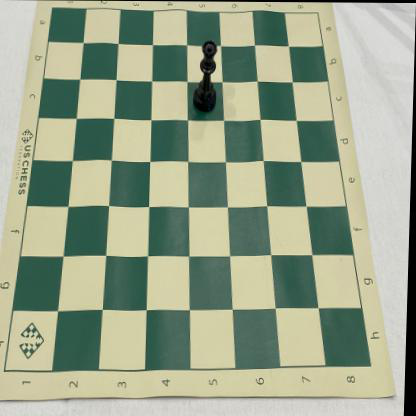

In [ ]:
img

In [ ]:
from mmdet import datasets

In [ ]:
# @DATASETS.register_module()
class ChessDataset(datasets.CocoDataset):
  CLASSES = ['pieces', 'bishop',
 'black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook']


In [ ]:
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='Ran', with_bbox=True),

    # dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.0),
    # dict(type='Normalize', **img_norm_cfg),
    # dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels']),
]

In [ ]:
ds = ChessDataset(
    ann_file = '/content/gdrive/MyDrive/datasets/ChessPiecesv24/annotations/instances_val.json',
    pipeline = train_pipeline,
    #  pipeline, classes=None, 
    data_root='/content/gdrive/MyDrive/datasets/ChessPiecesv24/valid'
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
ds.data_infos[:3]

[{'date_captured': '2021-02-23T17:32:58+00:00',
  'file_name': '0b2252c93c53e1b2e61d485b22328e2e_jpg.rf.0a885b88adc72caa71b0aa0ec20b863e.jpg',
  'filename': '0b2252c93c53e1b2e61d485b22328e2e_jpg.rf.0a885b88adc72caa71b0aa0ec20b863e.jpg',
  'height': 416,
  'id': 0,
  'license': 1,
  'width': 416},
 {'date_captured': '2021-02-23T17:32:58+00:00',
  'file_name': 'e1616dc9962fed075576ac4ea3553f51_jpg.rf.23145974270bfe4d2f07d2a73ead9923.jpg',
  'filename': 'e1616dc9962fed075576ac4ea3553f51_jpg.rf.23145974270bfe4d2f07d2a73ead9923.jpg',
  'height': 416,
  'id': 1,
  'license': 1,
  'width': 416},
 {'date_captured': '2021-02-23T17:32:58+00:00',
  'file_name': '5c19d3260762f5daa632d952bc0074d6_jpg.rf.250c45a5fed7c606ee8fe28810a219a2.jpg',
  'filename': '5c19d3260762f5daa632d952bc0074d6_jpg.rf.250c45a5fed7c606ee8fe28810a219a2.jpg',
  'height': 416,
  'id': 2,
  'license': 1,
  'width': 416}]

In [ ]:
ds[0]

{'gt_bboxes': DataContainer(tensor([[174.0000, 250.0000, 199.0000, 303.5000]])),
 'gt_labels': DataContainer(tensor([13])),
 'img': DataContainer(tensor([[[ 23.,   3.,  85.,  ..., 217., 218., 213.],
          [  0.,  84., 177.,  ..., 217., 219., 217.],
          [ 64., 178., 229.,  ..., 215., 220., 222.],
          ...,
          [212., 210., 211.,  ..., 216., 216., 216.],
          [212., 210., 211.,  ..., 215., 215., 216.],
          [209., 207., 209.,  ..., 214., 214., 215.]],
 
         [[ 25.,   5.,  87.,  ..., 219., 220., 215.],
          [  0.,  86., 179.,  ..., 219., 221., 219.],
          [ 66., 180., 231.,  ..., 217., 222., 224.],
          ...,
          [217., 215., 216.,  ..., 221., 221., 221.],
          [217., 215., 216.,  ..., 220., 220., 221.],
          [214., 212., 214.,  ..., 219., 219., 220.]],
 
         [[ 25.,   5.,  87.,  ..., 219., 220., 215.],
          [  0.,  86., 179.,  ..., 219., 221., 219.],
          [ 66., 180., 231.,  ..., 217., 222., 224.],
         

In [ ]:
ds


ChessDataset Train dataset with number of images 58, and instance counts: 
+-------------------+-------+-----------------+-------+------------------+-------+------------------+-------+------------------+-------+
| category          | count | category        | count | category         | count | category         | count | category         | count |
+-------------------+-------+-----------------+-------+------------------+-------+------------------+-------+------------------+-------+
| 0 [pieces]        | 0     | 1 [bishop]      | 0     | 2 [black-bishop] | 22    | 3 [black-king]   | 29    | 4 [black-knight] | 30    |
| 5 [black-pawn]    | 77    | 6 [black-queen] | 11    | 7 [black-rook]   | 28    | 8 [white-bishop] | 22    | 9 [white-king]   | 29    |
| 10 [white-knight] | 19    | 11 [white-pawn] | 77    | 12 [white-queen] | 16    | 13 [white-rook]  | 26    | -1 background    | 0     |
+-------------------+-------+-----------------+-------+------------------+-------+------------------+-

In [ ]:
ds.pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', channel_order='bgr', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, file_client_args={'backend': 'disk'})
    RandomFlip(flip_ratio=0.0)
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [ ]:
ds[0]['img'].data.shape

torch.Size([3, 416, 416])

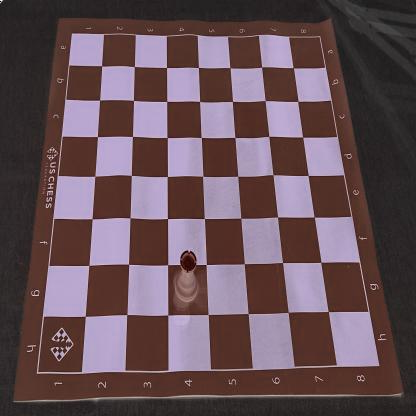

In [ ]:
to_pil_image(ds[0]['img'].data)

In [ ]:
from torchvision.transforms.functional import to_pil_image

In [ ]:
ds[0]['img'].data.shape

torch.Size([3, 416, 416])

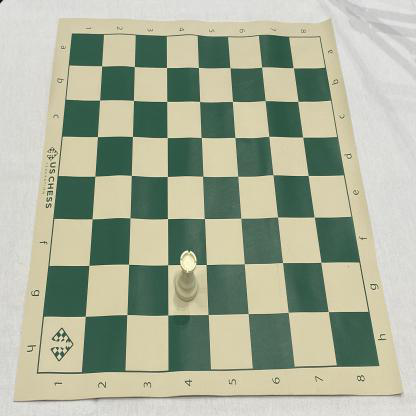

In [ ]:
Image.open(ds[0]['img_metas'].data['filename'])

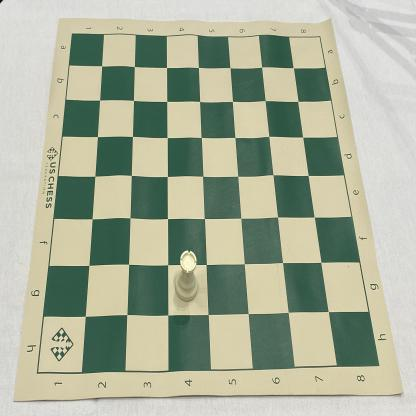

In [ ]:
Image.fromarray(ds[0]['img'].data.permute(1, 2, 0).numpy().astype('uint8')[:,:,::-1])

### Transforms

https://mmdetection.readthedocs.io/en/stable/api.html#module-mmdet.datasets.pipelines

`CopyPaste(max_num_pasted=100, bbox_occluded_thr=10,mask_occluded_thr=300, selected=True)`

`.CutOut(n_holes, cutout_shape=None, cutout_ratio=None, fill_in=(0, 0, 0))`

`.MinIoURandomCrop(min_ious=(0.1, 0.3, 0.5, 0.7, 0.9), min_crop_size=0.3, bbox_clip_border=True)`

`.MixUp(img_scale=(640, 640), ratio_range=(0.5, 1.5), flip_ratio=0.5, pad_val=114, max_iters=15, min_bbox_size=5, min_area_ratio=0.2, max_aspect_ratio=20, bbox_clip_border=True, skip_filter=True)`

`RandomAffine(max_rotate_degree=10.0, max_translate_ratio=0.1, scaling_ratio_range=(0.5, 1.5), max_shear_degree=2.0, border=(0, 0), border_val=(114, 114, 114), min_bbox_size=2, min_area_ratio=0.2, max_aspect_ratio=20, bbox_clip_border=True, skip_filter=True)`

`RandomCenterCropPad(crop_size=None, ratios=(0.9, 1.0, 1.1), border=128, mean=None, std=None, to_rgb=None, test_mode=False, test_pad_mode=('logical_or', 127), test_pad_add_pix=0, bbox_clip_border=True)`

`.RandomCrop(crop_size, crop_type='absolute', allow_negative_crop=False, recompute_bbox=False, bbox_clip_border=True)`

`.YOLOXHSVRandomAug(hue_delta=5, saturation_delta=30, value_delta=30)`

`Albu(transforms, bbox_params=None, keymap=None, update_pad_shape=False, skip_img_without_anno=False)`

In [ ]:
new_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RandomCrop', crop_size=[320, 360], allow_negative_crop=True),
    dict(type='YOLOXHSVRandomAug'),
    # dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.0),
    # dict(type='Normalize', **img_norm_cfg),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels']),
]

In [ ]:
new_ds = ChessDataset(
    ann_file = '/content/gdrive/MyDrive/datasets/ChessPiecesv24/annotations/instances_val.json',
    pipeline = new_pipeline,
    #  pipeline, classes=None, 
    data_root='/content/gdrive/MyDrive/datasets/ChessPiecesv24/valid'
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


(384, 320)


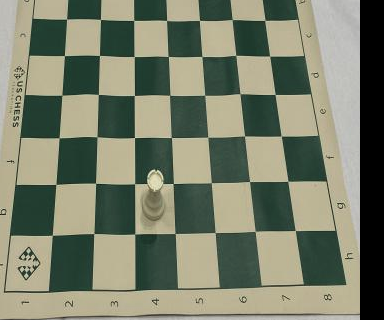

In [ ]:
img = Image.fromarray(new_ds[0]['img'].data.permute(1, 2, 0).numpy().astype('uint8')[:,:,::-1])
print(img.size)
img

MultiImageMixDataset

In [ ]:
base_pipeline = new_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RandomCrop', crop_size=[320, 360], allow_negative_crop=True),
    dict(type='YOLOXHSVRandomAug'),
    # dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.0),
    # dict(type='Normalize', **img_norm_cfg),
    dict(type='Pad', size_divisor=32)
]

In [ ]:
base_ds = ChessDataset(
    ann_file = '/content/gdrive/MyDrive/datasets/ChessPiecesv24/annotations/instances_val.json',
    pipeline = base_pipeline,
    data_root='/content/gdrive/MyDrive/datasets/ChessPiecesv24/valid'
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
multi_pipeline = [
    dict(type='MixUp'),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels']),
    ]

In [ ]:
multi_ds = datasets.MultiImageMixDataset(
    base_ds,
    pipeline = multi_pipeline
    )

(384, 320)


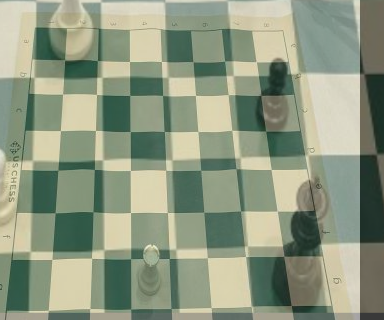

In [ ]:
img = Image.fromarray(multi_ds[0]['img'].data.permute(1, 2, 0).numpy().astype('uint8')[:,:,::-1])
print(img.size)
img